### HARI PRASATH S

# Lab 14: Classification of CIFAR-10 data with Data Augmentation

#### Step 1:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.backend import categorical_crossentropy
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

#### Step 2:

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print('Shape of X_train is {}'.format(X_train.shape))
print('Shape of X_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of X_train is (50000, 32, 32, 3)
Shape of X_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


#### Step 3:

In [4]:
num_classes =10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

#### Step 4:

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
print('Shape of one sample of X_train is {}'.format(X_train[37].shape))
print('Shape of one sample of y_train is {}'.format(y_train[37].shape))

Shape of one sample of X_train is (32, 32, 3)
Shape of one sample of y_train is (10,)


In [7]:
X_train[25]

array([[[0.63529414, 0.6431373 , 0.50980395],
        [0.6431373 , 0.654902  , 0.5019608 ],
        [0.6627451 , 0.67058825, 0.5137255 ],
        ...,
        [0.72156864, 0.6901961 , 0.5372549 ],
        [0.74509805, 0.7294118 , 0.57254905],
        [0.7921569 , 0.7764706 , 0.6313726 ]],

       [[0.6       , 0.5921569 , 0.46666667],
        [0.61960787, 0.6117647 , 0.47058824],
        [0.6431373 , 0.6392157 , 0.4862745 ],
        ...,
        [0.69803923, 0.67058825, 0.5137255 ],
        [0.7411765 , 0.72156864, 0.56078434],
        [0.7882353 , 0.7764706 , 0.61960787]],

       [[0.6156863 , 0.5921569 , 0.47058824],
        [0.6313726 , 0.6117647 , 0.4745098 ],
        [0.6431373 , 0.627451  , 0.47843137],
        ...,
        [0.69803923, 0.6666667 , 0.5137255 ],
        [0.74509805, 0.7294118 , 0.5568628 ],
        [0.7921569 , 0.78039217, 0.6117647 ]],

       ...,

       [[0.8392157 , 0.8039216 , 0.75686276],
        [0.8352941 , 0.75686276, 0.70980394],
        [0.8352941 , 0

In [8]:
y_train[25]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

#### Step 5:

In [9]:
model = Sequential()
model.add(Conv2D(32, (5,5), strides=(2,2), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (5,5), strides=(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

#### Step-6:

In [10]:
# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [11]:
# Convert class vectors to binary class matrices (one-hot encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
# Build the neural network model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [13]:
# Compile the model
opt = RMSprop(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 5
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_split=0.2)

# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
1250/1250 - 97s - loss: 1.9363 - accuracy: 0.3440 - val_loss: 1.5432 - val_accuracy: 0.4498 - 97s/epoch - 78ms/step
Epoch 2/5
1250/1250 - 91s - loss: 1.5193 - accuracy: 0.4597 - val_loss: 1.3304 - val_accuracy: 0.5276 - 91s/epoch - 73ms/step
Epoch 3/5
1250/1250 - 85s - loss: 1.3932 - accuracy: 0.5082 - val_loss: 1.5176 - val_accuracy: 0.4825 - 85s/epoch - 68ms/step
Epoch 4/5
1250/1250 - 85s - loss: 1.3380 - accuracy: 0.5299 - val_loss: 1.1667 - val_accuracy: 0.5917 - 85s/epoch - 68ms/step
Epoch 5/5
1250/1250 - 85s - loss: 1.2967 - accuracy: 0.5518 - val_loss: 1.1307 - val_accuracy: 0.6052 - 85s/epoch - 68ms/step
Test loss: 1.1352791786193848
Test accuracy: 0.5971999764442444


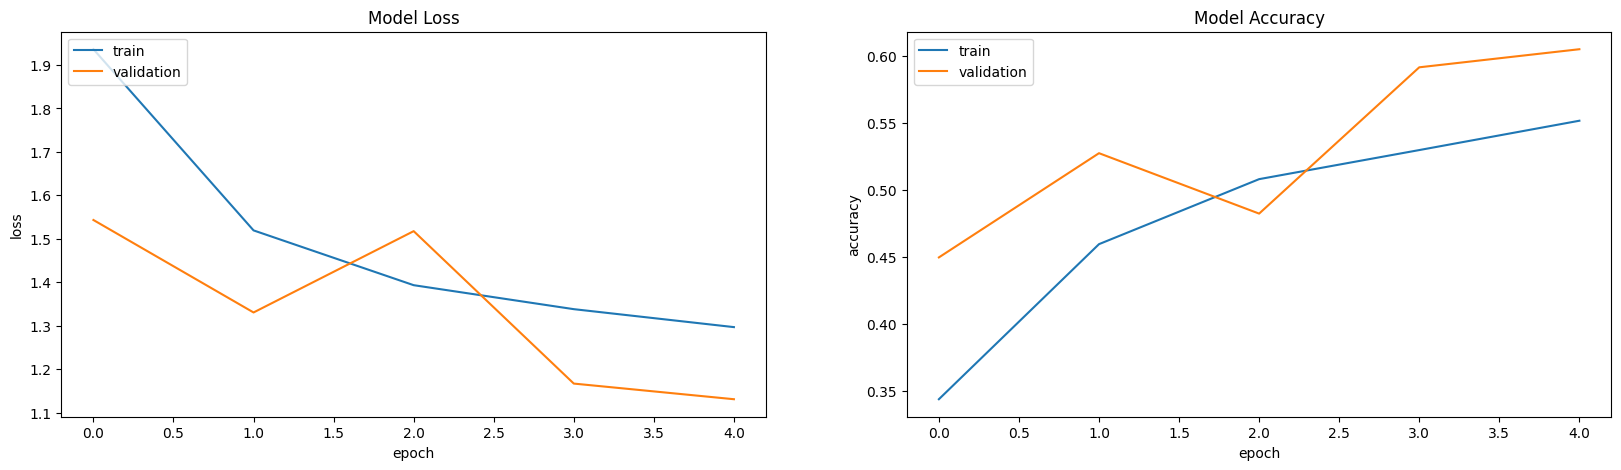

In [14]:
fig = plt.figure(figsize=(20, 5))
fig.add_subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
fig.add_subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Step 7:

In [15]:
datagen = ImageDataGenerator(featurewise_center=False,
samplewise_center=False,

featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
rotation_range=0,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip=True,
vertical_flip=False)

datagen.fit(X_train)

In [16]:
import tensorflow as tf
batch_size = 32
opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0005, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [17]:
history1 = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),steps_per_epoch=X_train.shape[0] // batch_size,
epochs=5,

validation_data=(X_test, y_test))

C:\Users\HP\AppData\Local\Temp\ipykernel_11352\3431054492.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),steps_per_epoch=X_train.shape[0] // batch_size,


Epoch 1/5
1562/1562 [==============================] - 141s 88ms/step - loss: 1.3957 - accuracy: 0.5163 - val_loss: 1.4153 - val_accuracy: 0.5091
Epoch 2/5
1562/1562 [==============================] - 136s 87ms/step - loss: 1.3769 - accuracy: 0.5207 - val_loss: 1.2029 - val_accuracy: 0.5736
Epoch 3/5
1562/1562 [==============================] - 129s 83ms/step - loss: 1.3485 - accuracy: 0.5353 - val_loss: 1.1710 - val_accuracy: 0.5857
Epoch 5/5
1562/1562 [==============================] - 129s 83ms/step - loss: 1.3434 - accuracy: 0.5410 - val_loss: 1.4247 - val_accuracy: 0.5093


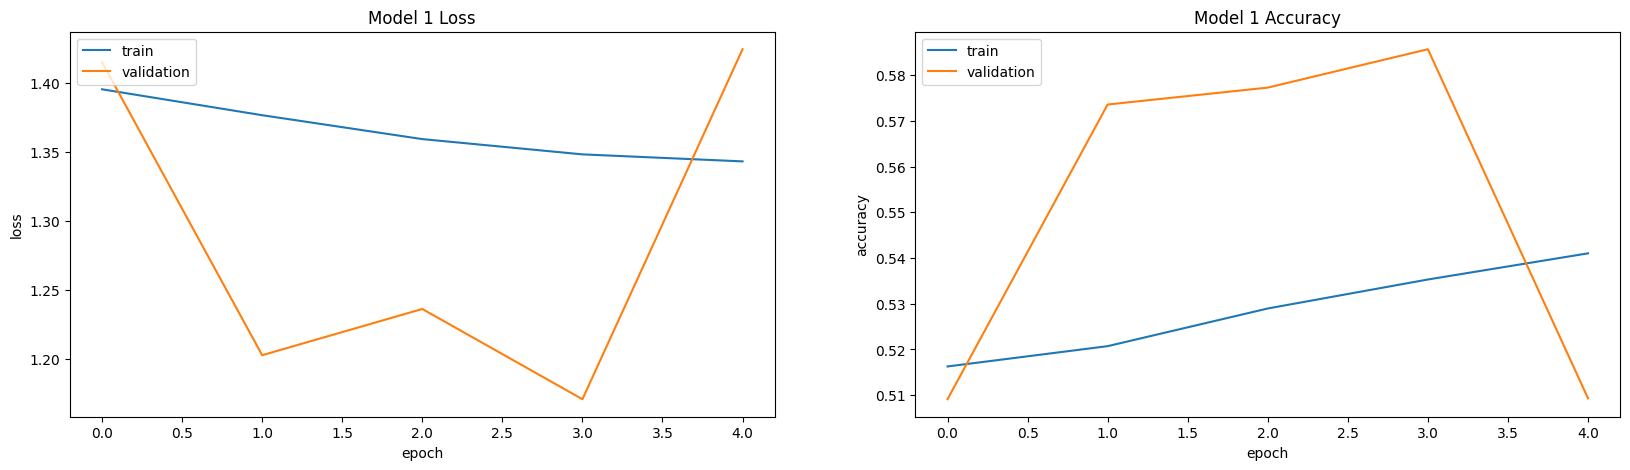

In [18]:
fig = plt.figure(figsize=(20, 5))
fig.add_subplot(1,2,1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model 1 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
fig.add_subplot(1,2,2)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Step 8:

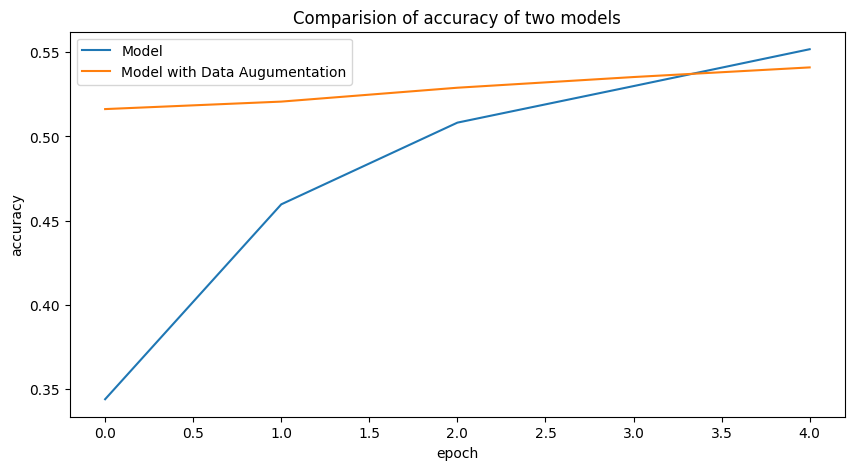

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.title('Comparision of accuracy of two models')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Model', 'Model with Data Augumentation'], loc='upper left')
plt.show()

#### Step 9:

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense


input_shape = (128, 128, 3) 

model2 = Sequential()
model2.add(Conv2D(32, (5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model2.add(Conv2D(32, (5, 5), strides=(1, 1)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, (5, 5), strides=(1, 1), padding='same', activation='relu'))
model2.add(Conv2D(32, (5, 5), strides=(1, 1)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer should produce an output that matches the input shape of the Dense layer
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))  # Updated to specify activation here
model2.add(Dense(num_classes, activation='softmax'))  # Updated to specify activation here
model2.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      2432      
                                                                 
 conv2d_7 (Conv2D)           (None, 124, 124, 32)      25632     
                                                                 
 activation_10 (Activation)  (None, 124, 124, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        25632     
                                                                 
 conv2d_9 (Conv2D)           (None, 58, 58, 32)        25632     
                                                      

In [21]:
import tensorflow as tf  # Import TensorFlow's Keras submodule
batch_size = 32
opt = tf.keras.optimizers.legacy.RMSprop(lr=0.0005, decay=1e-6)  # Use the legacy optimizer
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      2432      
                                                                 
 conv2d_7 (Conv2D)           (None, 124, 124, 32)      25632     
                                                                 
 activation_10 (Activation)  (None, 124, 124, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        25632     
                                                                 
 conv2d_9 (Conv2D)           (None, 58, 58, 32)        25632     
                                                      

C:\Users\HP\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
